In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def RRF(v, k, ang):
    matrix = v*np.cos(ang) + np.cross(k, v)*np.sin(ang) + k*np.dot(k, v)*(1 - np.cos(ang))
    return matrix


p = 0.5*np.sqrt((0.450+0.425)**2 + (0.350+0.350)**2)
w = RRF(np.array([p, 0, 0]), np.array([0,0,1]), np.deg2rad(60))
#rotates the point (0,p) 60 deg to the right

slope = (p - w[0])/w[1]

def VolumeTester(x, y, z):
    if -0.5 <= z <= 0.5:
        if x == w[1]:
            if -w[0] <= y <= w[0]:
                return True
        elif x == -w[1]:
            if -w[0] <= y <= w[0]:
                return True
        elif x > 0 and y > 0:
            if x <= w[1]:
                if y <= -x*(slope) + p:
                    return True
        elif x < 0 and y > 0:
            if x >= -w[1]:
                if y <= x*(slope) + p:
                    return True
        elif x < 0 and y < 0:
            if x >= -w[1]:
                if y >= -x*(slope) - p:
                    return True
        else:
            if x <= w[1]:
                if y >= x*(slope) - p:
                    return True
    return False

def LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint, epsilon=1e-6):
 
    ndotu = planeNormal.dot(rayDirection)
    if abs(ndotu) >= epsilon:
        w = rayPoint - planePoint
        si = -planeNormal.dot(w) / ndotu
        Psi = w + si * rayDirection + planePoint
        return Psi
    else:
        return np.nan
    


In [3]:
vertx = np.zeros(1000) + w[1]
verty = np.linspace(-w[0], w[0], 1000)


sidey1 = []
sidey4 = []
posxs = np.linspace(0, w[1], 1000)

for i in posxs:
    sidey1.append(-i*(slope) + p)
    sidey4.append(i*(slope) - p)

sidey2 = []
sidey3 = []
negxs = np.linspace(-w[1], 0, 1000)
for i in negxs:
    sidey2.append(i*(slope) + p)
    sidey3.append(-i*(slope) - p)

Hexagonx = [*vertx, *posxs, *negxs, *-vertx, *negxs, *posxs]
Hexagony = [*verty, *sidey1, *sidey2, *verty, *sidey3, *sidey4]

__BELOW IS GETTING LENGTH OF ICECUBE FROM INPUTED ANGLE AND RANDOM POINT ON NORMAL PLANE__

Enter a non-zero phi angle between -90 and 90: 12
Enter a theta angle between 0 and 360: 12
[array([ 0.48521097, -0.22736513, -0.34190623]), array([ 1.1276941 , -0.09080112, -0.20534222]), array([-2.44185483, -0.84953217, -0.96407327]), array([-0.48521097, -0.43363468, -0.54817578]), array([-0.29088679, -0.3923298 , -0.5068709 ]), array([ 0.62987234, -0.19661641, -0.31115751]), array([4.44606836, 0.6145411 , 0.5       ]), array([-0.25856175, -0.3854589 , -0.5       ])]
[False, False, False, False, False, False, False, False]


<IPython.core.display.Javascript object>


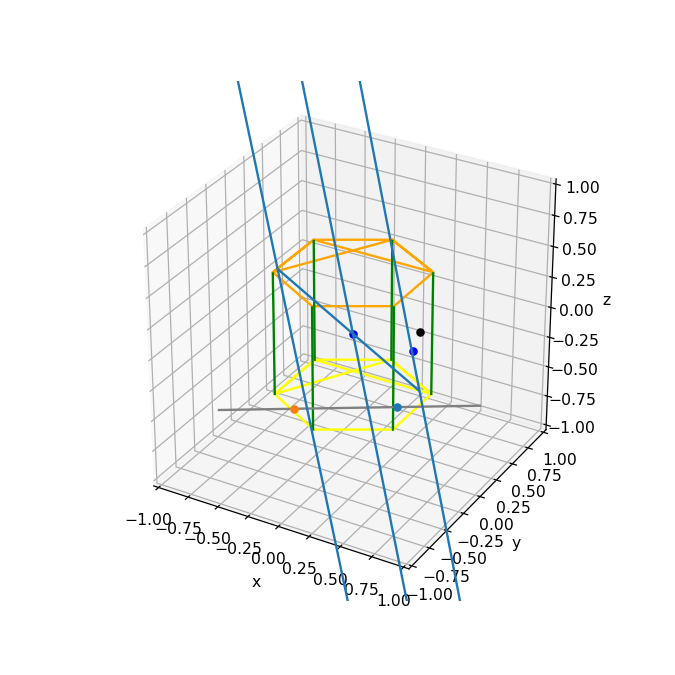

The equation of the plane is: 0.48521097215541203x + 0.10313477592592322y + 0.10313477592592322z + -0.0 = 0
The points of intersection are:  [array([ 0.48521097, -0.22736513, -0.34190623]), array([-0.25856175, -0.3854589 , -0.5       ])]
The distance between the two points are:  0.7766499462052239
1.3457920551300049


In [4]:
import time 
start = time.time()

delta = 1e-6
max_ang = np.degrees(np.arctan(0.5/p))
phi = float(input('Enter a non-zero phi angle between -90 and 90: '))
theta = float(input('Enter a theta angle between 0 and 360: '))

if -max_ang <= phi <= max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x = w[1]
        y = x*np.tan(theta)
        z = x*np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]) , np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x = w[1]
        y = x*np.tan(theta)
        z = x*np.tan(phi)

elif phi > max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = 0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = 0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)

elif phi < -max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = -0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = -0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)

#The mess of code above gets the normal vector based off theta and phi        
#the next few lines get the actual plane
center  = np.array([0, 0, 0])
normal = np.array([x, y, z])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -center.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-1, 2), range(-1 ,2))

# calculate corresponding z
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

#grab a random point on the plane within the volume

test = False
while test != True:
    xn = np.random.uniform(-w[1], w[1])
    yn = np.random.uniform(-p,p)
    zn = (d - normal[0]*xn - normal[1]*yn)/normal[2]
    if VolumeTester(xn, yn, zn):
        test = True
    
wn = np.array([xn, yn, zn])

shifted = normal + wn

#get the ray connecting the shifted points
t = np.arange(-2, 2, 0.1)
q = shifted - wn
rayx = wn[0] + q[0]*t
rayy = wn[1] + q[1]*t
rayz = wn[2] + q[2]*t

#generate lines connecting top and bottom
ax = np.zeros(100)
ay = np.arange(-0.5, 0.5, 0.5/50)

#Grabbing normal vector off each plane
raypoint = wn
raydirection = normal

pn1 = np.array([1, 0, 0])
pn2 = np.array([0.5, np.sqrt(3)/2, 0])
pn3 = np.array([-0.5, np.sqrt(3)/2, 0])
pn4 = np.array([-1, 0, 0])
pn5 = np.array([-0.5, -np.sqrt(3)/2, 0])
pn6 = np.array([0.5, -np.sqrt(3)/2, 0])
pn7 = np.array([0, 0, 1])
pn8 = np.array([0, 0, -1])

norms = [pn1, pn2, pn3, pn4, pn5, pn6, pn7, pn8]

#grabbing random point off each plane and finding intersection
pointsx = [vertx, posxs, negxs, -vertx, negxs, posxs]
pointsy = [verty, sidey1, sidey2, verty, sidey3, sidey4]

pp1 = np.array([w[1], 0, 0])
pp2 = RRF(pp1, np.array([0, 0, 1]), np.deg2rad(60))
pp3 = RRF(pp2, np.array([0, 0, 1]), np.deg2rad(60))
pp4 = RRF(pp3, np.array([0, 0, 1]), np.deg2rad(60))
pp5 = RRF(pp4, np.array([0, 0, 1]), np.deg2rad(60))
pp6 = RRF(pp5, np.array([0, 0, 1]), np.deg2rad(60))
pp7 = np.array([0, 0, 0.5])
pp8 = -pp7

points = [pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]

pospoint = [LinePlaneCollision(norms[i], points[i], raydirection, raypoint) for i in range(len(norms))]
check = [np.all(np.isnan(LinePlaneCollision(norms[i], points[i], raydirection, raypoint))) for i in range(len(norms))]

pas = []
fail = []
for i in range(len(check)):
    if not check[i]:
        if VolumeTester(pospoint[i][0], pospoint[i][1], pospoint[i][2]) or VolumeTester(pospoint[i][0] + delta, pospoint[i][1] + delta, pospoint[i][2] + delta) or VolumeTester(pospoint[i][0]-delta, pospoint[i][1]-delta, pospoint[i][2]-delta):
            pas.append(pospoint[i])
        else:
            fail.append(pospoint[i])
# plot everything
%matplotlib notebook

plt3d = plt.figure(figsize = (6,6)).gca(projection='3d')

plt3d.plot_wireframe(xx, yy, zz)
plt3d.plot(Hexagonx, Hexagony, -0.5, color = 'yellow')
plt3d.plot(Hexagonx, Hexagony, 0.5, color = 'orange')
plt3d.plot(ax + p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax - p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.plot(rayx, rayy, rayz, color = 'gray')
plt3d.scatter(x, y, z, color = 'black')
#plt3d.scatter(wn[0], wn[1], wn[2], color = 'red')
#plt3d.scatter(shifted[0], shifted[1], shifted[2], color = 'purple')
plt3d.scatter(w[1], 0, 0, color = 'blue')
plt3d.scatter(0, 0, 0, color = 'blue')
for ps in range(len(pas)):
    plt3d.scatter(pas[ps][0], pas[ps][1], pas[ps][2])
    #print(p[ps][0], p[ps][1], p[ps][2])



plt3d.set_xlabel('x')
plt3d.set_ylabel('y')
plt3d.set_zlabel('z')


plt3d.set_xlim(-1,1)
plt3d.set_ylim(-1,1)
plt3d.set_zlim(-1,1)

plt.show()


print('The equation of the plane is: {}x + {}y + {}z + {} = 0'.format(normal[0], normal[1], normal[2], d))
#print(wn[0], wn[1], wn[2])
print('The points of intersection are: ', pas)
if len(pas) == 2:
    print('The distance between the two points are: ', np.linalg.norm(pas[1] - pas[0]))
else:
    print('Only returned one point or none, not counting this one')
    
end = time.time()

print(end-start)